# Introduction to Regression with stats models in Python 
- regression?
  1. statistical models to explore the relationship a response variable and some explanatory variable
  2. given values of explanatory variables, you can predict the values of the response variable
- response variable (aka dependent variable/y) >> the want to predict
- explanatory variable (aka independent variable) >> the variable that explain how the response variable will change

- type of regression
  1. Linear regression : the response variable is numeric
  2. Logistic regression: the response variable is logical (True or False values)
  3. Simple linear/Logistic regression : only have single explanatory variable
 
- visualizing pairs of variable ( scatterplot/heatmap/jointplot/regplot/lmplot)
- trendline a line that follow data point

- python packages for regression
  1. statsmodel :focus on insight
  2. scikit-learn: focus to prediction 


In [1]:
import pandas as pd
# import all data sources 
churn = pd.read_csv('churn.csv') 
taiwan_real_estate=pd.read_csv('taiwan_real_estate2.csv')
ad_conversion = pd.read_csv('ad_conversion.csv')
sp500_yearly_returns= pd.read_csv('sp500_yearly_returns.csv')
fish = pd.read_csv('fish.csv')

/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


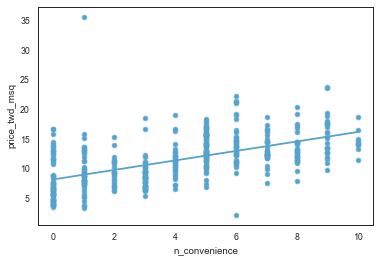

In [2]:
# Import seaborn with alias sns
import seaborn as sns 

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt 

sns.set_context('paper')
sns.set_style('white')
sns.set_palette("icefire")
# Draw the scatter plot
sns.scatterplot(x='n_convenience', y='price_twd_msq',data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()



# Fitting a linear regression 
- Straight lines are defined by two things
1. Intercept : the y value at the point when x is zero
2. Slope : The amount the y value increases if you increase x by one
3. Equation: y = intercept + slope*x, slope == coefficient 
4. Estimating the slope
   - one point in y - one point in y --> got y diff
   - one point in x - one point in x --> got x diff
   - slope = y(diff)/x(diff)  
6. Running amodel
   - from statsmodels.formula.api import ols
   - mdl_payment_vs_claims = ols('total_payment_sek ~ n_claims",data=swedish_motor_insurance)>> the explanatory is in the right while the response variable is on the left 
   - mdl_payment_vs_claims = mdl_payment_vs_claims.fit()
   - print(mdl_payment_vs_claims.params) 

In [3]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq~n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


# Categorical Explanatory Variables 
- visualizing 1 numeric and 1 categorical variable
- sns.displot(data=fixh, x='mass_g', col='species', col_wrap=2, bins=9)
- Summary  statistics
- call linear regression same as above
  1. from statsmodels.formula.api import ols
  2. mdl_mass_vs_species=ols('mass_g~species+0',data=fish).fit() >> +0 specify that all the coefficients should be given relative to zero 
  3. print(mdl_mass_vs_species.params)
- In case of a single, categorical variable, coefficients == means 

/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


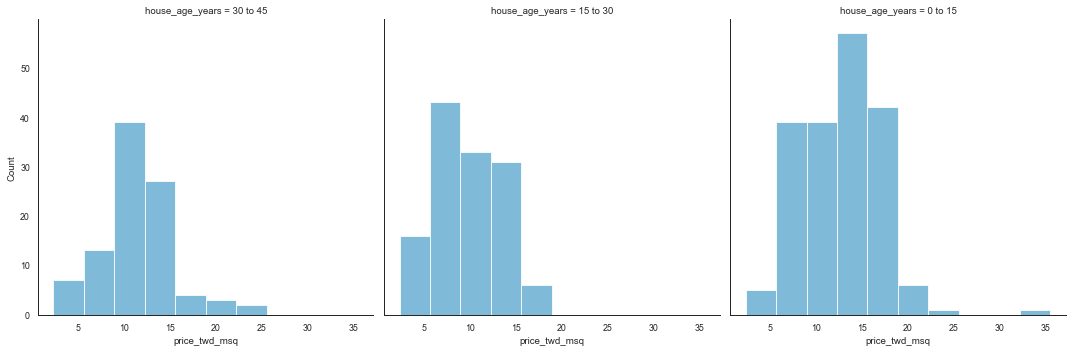

In [4]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         bins=10,
         col='house_age_years',
         col_wrap=3)

# Show the plot
plt.show()

In [5]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [6]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq~house_age_years+0', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


# Making Predictions 
- step by step 
    1. visualize correlation
    2. running the model and fitting the model
    3. remember the equation ~~ y = intercept+slope*x >> so if you got the intercept,and slope, you only need x, in this situation x is known and y value will be predicted
       - e.g explanatory_data = pd.DataFrame({'length_cm':np.arange(20,41)}) >> end of interval not include this value
       - call predict on the model >> print(mdl_mass_vs_length.predict(explanatory_data)) or prediction_data = explanatory_data.assign(mass_g=mdl_mass_vs_length.predict(explanatory_data))
    4. Showing predictions
       - import matplotlib.pyplot as plt
       - import seaborn as sns
       - fig = plt.figure() >> to show multiple plot 
       - sns.regplot(x='length_cm',y='mass_g', ci=None, data=bream)
       - sns.scatterplot(x='length_cm', y='mass_g', data=prediction_data, color='red',marker='s')
       - plt.show()
- Extrapolating : making predictions outside the range of observed data. sometimess appropriate, but it can lead to misleading or ridiculous results
- Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine wheter a prediction is nonsense or not

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


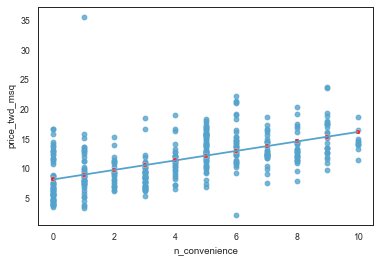

In [7]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

# Create a new figure, fig
fig = plt.figure() 

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,color='red',marker='s')

# Show the layered plot
plt.show()

In [8]:
# Define a DataFrame impossible
impossible = pd.DataFrame({'n_convenience':[-1,2.5]})
predict = impossible.assign(ms=mdl_price_vs_conv.predict(impossible))
predict

n_convenience         ms
0           -1.0   7.426158
1            2.5  10.219437

# Working with model objects 
- from statsmodels.formula.api import ols
- mdl_mass_vs_length = ols('mass_g~length_cm',data=bream).fit()
- print(mdl_mass_vs_length.params)
- print( mdl_mass_vs_length.fittedvalues) >> fittedvalues: predictions on the original datasets or equivalently :
  - explanatory_data=bream['length_cm']
  - print(mdl_mass_vs_lenght.predict(explanatory_data))
- print(mdl_mass_vs_length.resid) >> residuals: actual response values minus predicted response values or equivalently:
  - print(bream['mass_g']-mdl_mass_vs_length.fittedvalues) 
- mdl_mass_vs_length.summary() >> shows a more extended printout of the details of the model 

In [9]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [10]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [11]:
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [12]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           3.41e-37
Time:                        09:50:27   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [13]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params
coeffs

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [14]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

#Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept+slope*explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


# Regression to the mean 
- The concept:
  1. Response value == fitted value + residual
  2. The stuff you explained + the stuff you couldn't explain
  3. Residuals exist due to problems in the model and fundamental randomness
  4. Extreme cases are often due to randomness
  5. Regression to the mean means extreme cases don't persist over time
- cases : do taller father have taller son?
  - visualizing
  - fig = plt.figure()
  - sns.scatterplot(x='father_height',y='sons_height', data=father_son)
  - sns.regplot(x='father_height',y='sons_height', data=father_son, ci=None, line_kws={'color':'black'})
  - plt.axline(xy1=(150,150), slope=1, linewidth=2, color='green')
  - plt.axis('equal') >> 1 cm in x-axis == y-axis
  - plt.show()
- running regression
- extreme value become less extreme in the next generation 

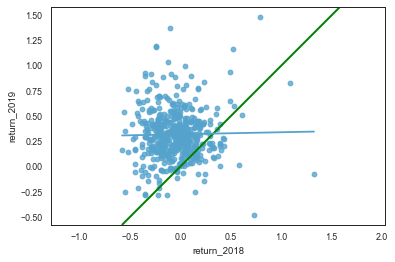

In [15]:
# Create a new figure, fig
fig = plt.figure() 

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(data=sp500_yearly_returns,x='return_2018',y='return_2019', ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()


In [16]:

mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018':[-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(explanatory_data.assign(return_2019=mdl_returns.predict(explanatory_data)))

   return_2018  return_2019
0           -1     0.301251
1            0     0.321321
2            1     0.341390


# Transforming Variables 
- Visualizing the data
  - Plotting mass vs length cubed
  - perch['length_cm_cubbed'] = perch['length_cm']**3
  - sns.regplot(x='length_cm_cubed',y='mass_g', data=perch,ci=None)
  - plt.show()
  - mdl_perch = ols('mass_g ~ length_cm_cubed',data=perch).fit()
  - mdl_perch.params
  - explanatory_data = pd.DataFrame({'length_cm_cubed':np.arange(10,41,5)**3, 'length_cm':np.arange(10,41,5)})
  - prediction = explanatory_data.assign(mms=mdl_perch.predict(explanatory_data)
  - fig = plt.figure()
  - sns.regplot()
  - sns.scatterplot()

- another example facebook adv dataset
  - visualizing the spent usd to n_impression, plot is cramped into bottom left
  - change into square root
  - ad_converson['sqrt_spent_usd'] = np.sqrt(ad_conversion['spent_usd'])
  - ad_converson['sqrt_n_impressions'] = np.sqrt(ad_conversion['n_impression'])
  - sns.regplot(x='sqrt_spent_usd', y='sqrt_n_impression', data=ad_conversion, ci=None)
  - mdl_ad = ols('sqrt_n_impressions~sqrt_spent_usd', data=ad_conversion).fit()
  - explanatory_data = pd.DataFrame({'sqrt_spent_usd':np.sqrt(np.arange(0,601,100),'spent_usd':np.arange(0,601,100)})
  - prediction_data = explanatory_data.assign(sqrt_n_impressions=mdl_ad.predict(explanatory_data), n_impressions = mdl_ad.predict(explanatory_data)**2)
  - print(prediction_data)
 
- undoing transformation called back transformations
- 

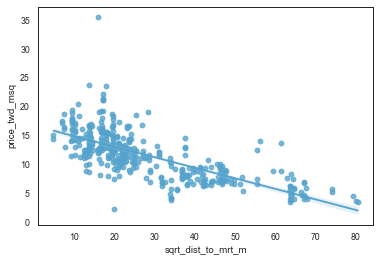

In [17]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(data=taiwan_real_estate,x='sqrt_dist_to_mrt_m',y='price_twd_msq')
plt.show()

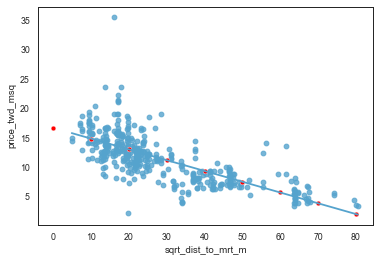

In [18]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x='sqrt_dist_to_mrt_m', y='price_twd_msq', color='red')
plt.show()



   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


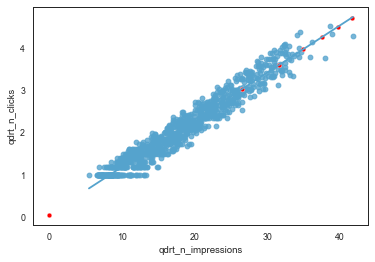

In [19]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="qdrt_n_impressions", y="qdrt_n_clicks", color='red')
plt.show()

# Quantifying model fit 
- How strong is the linear relationship?
1.  Using coefficient of determination (r-squared if you have 1 explanatory variable or R-squared if you have more than explanatory variable)
   - 1 means a perfect fit , 0 means the worst possible fit
   - .summary() after fitting the model
   - .rsquared to substract r squared
     
2. Residual standard Error (RSE)
   - a 'typical' difference between a prediction and an observed response
   - how much a prediction are typically wrong
   - MSE = RSE2, MSE : the squared residual standard error
   - .mse_resid >> not include in summary
   - np.sqrt(mse) == rse
   - to calculate RSE yourself :
     1. first squared residuals, residuals_sq = mdl_bream.resid ** 2
     2. resid_sum_of_sq = sum(residuals_sq)
     3. print('resid sum of sq:', resid_sum_of_sq)
     4. calculate DF of residuals, degrees of freedom equals the number of observations minus the number of model coefficients
     5. deg_freedom = len(bream.index) -2
     6. rse = np.sqrt(resid_sum_of_sq/deg_freedom)
     7. mdl_bream has an RSE of 74 meaning : the difference between predicted bream masses and observed bream masses is typically about 74 gram
   - RSE is a measure of accuracy for regression models 
    
3. Root-mean-square error (RMSE)
   - calculate almost the same with RSE only you don't need to calculate the coefficient to get degree of freedom just the length of observations data
   - rmse = np.sqrt(resid_sum_of_sq/n_obs) 


In [20]:
mdl_click_vs_impression_trans = mdl_click_vs_impression
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())


                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:50:28   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [21]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print("the number of impressions explains :" + str(mdl_click_vs_impression_orig.rsquared*100) +"% of the variability in the number of clicks ")

# Print the coeff of determination for mdl_click_vs_impression_trans
print("the number of impressions explains :" + str(mdl_click_vs_impression_trans.rsquared*100) +"% of the variability in the number of clicks ")


the number of impressions explains :89.1613497350804% of the variability in the number of clicks 
the number of impressions explains :94.45272817143905% of the variability in the number of clicks 


In [22]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig, "meaning: the typical difference between observed number of clicks and predicted number of clicks is 20")

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans =mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138 meaning: the typical difference between observed number of clicks and predicted number of clicks is 20
RSE of transformed model:  0.19690640896875722


# Visualizing model fit 
- if a linear regression model is a good fit, then the residuals are approximately normally distributed with mean zero
- Residuals vs fitted plot >>  if residuals met the assumption that they are normally distributed with mean zero then thren line should equal y == 0 in the plot
- Q-Q plot >> another way to show whether the residual follow normal distribution
- Scale-location plot >> show the square root of the sandardized residuals vs the fitted values, show whether the size of the residuals gets bigger or smaller 
- To create the residuals vs fitted plot :
  - sns.residplot(x='length_cm', y='mass_g', data=bream, lowess= True)>> lowess is smoothing the line 
  - plt.xlabel('fitted values')
  - plt.ylabel('residual')
- To draw qqplot :
  - from statsmodels.api import qqplot
  - qqplot(data=mdl_bream.resid, fit=True, line = '45') >>line 45 degree of plot
- Scale-location plot how to create:
  - model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal
  - model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream))
  - sns.regplot(x=mdl_bream.fittedvalues, y=model_norm_residuals_abs_sqrt_bream, ci=None, lowess=True)
  - specify the x and y label 

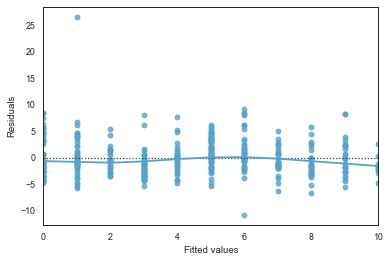

In [23]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

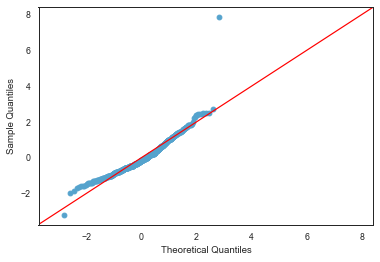

In [24]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

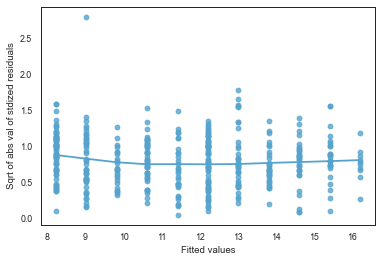

In [25]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues,y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

# Outliers, Leverage, Influence 
- how to visualize outlier:
  - roach['extreme_l']=((roach['length_cm'] <15)|(roach['length_cm'] >26))
  - fig = plt.figure()
  - sns.regplot(x='length_cm', y='mass-g', data=roach, ci=None)
  - sns.scatterplot(x='length_cm', y='mass_g', hue= 'extreme_l', data=roach)
- Leverage : is a measure of how extreme the explanatory variable values are. Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. 
- Influence : measures how much the model would change if you left the observation out of the dataset when modeling. Influence measures how much a model would change if each observation was left out of the model calculations, one at a time.
- how to calculate leverage and influence?
  - mdl_roach = ols('mass_g ~length_cm", data=roach).fit()
  - summary_roach = mdl_roach.get_influence().summary_frame()
  - roach['leverage']=summary_roach['hat_diag']
  - roach['cooks_dist/influence'] = summary_roach['cooks_dist']
  - remove the influence and put in visualization to see the effect 

In [31]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values(by = 'leverage',ascending=False))

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347      6488.0210              1        15 to 30       3.388805   
116      6396.2830              1        30 to 45       3.691377   
249      6306.1530              1        15 to 30       4.538578   
255      5512.0380              1        30 to 45       5.264750   
8        5512.0380              1        30 to 45       5.688351   
..             ...            ...             ...            ...   
269       837.7233              0        15 to 30       6.959153   
126       804.6897              4        30 to 45      19.031770   
265       815.9314              4        15 to 30      11.527988   
159       815.9314              4        15 to 30      11.316188   
157       815.9314              4        15 to 30      10.771558   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8  

In [32]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate['cooks_dist']= summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values(by='cooks_dist', ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  


# Why you need logistic regression 
- binary response variable
- logistic regression is another type of generalized linear model
- used when the response variable is logical/binary
- for example : churn or not churn customer prediction >> 0 or 1
- the responses follow logistic (S-shaped) curve
- to run logistic regression:
  - from statsmodels.formula.api import logit
  - mdl_churn_vs_recency_logit = logit('has_churned ~ time_since_last_purchase', data = churn).fit()
  - print(mdl_churn_vs_recency_logit.params(=)
  - plotting the data
  - sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn, ci=None, logistic=True)
  - plt.axline(xy1=(0,intercept), slope=slope, color='black')
  - plt.show() 

/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


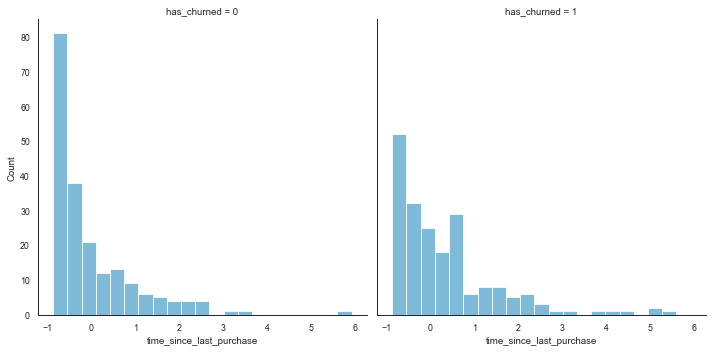

In [33]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, x='time_since_last_purchase',col='has_churned' )

plt.show()

/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


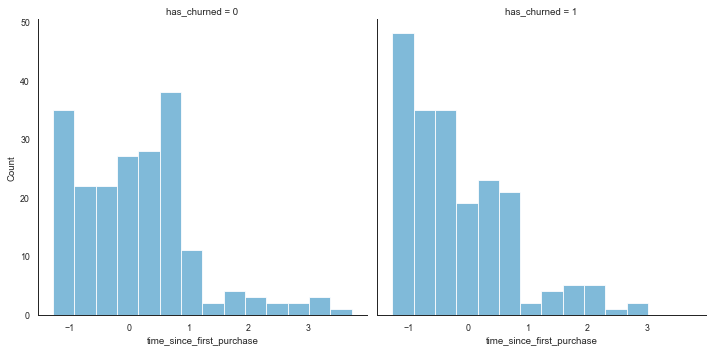

In [34]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn, x='time_since_first_purchase',col='has_churned' )

plt.show()

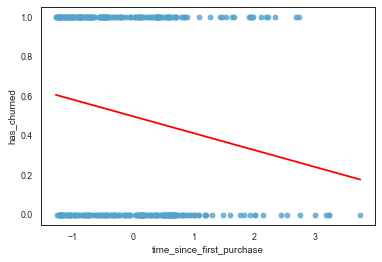

In [35]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase', y='has_churned',ci=None,  data=churn,
            line_kws={"color": "red"})

plt.show()

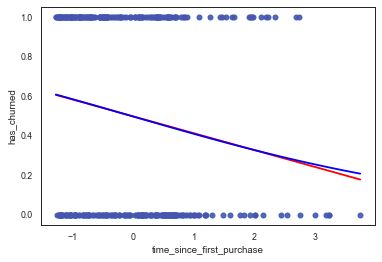

In [36]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "blue"},
            logistic=True)

plt.show()

In [39]:
# Import logit
from statsmodels.formula.api import logit 

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned~time_since_first_purchase', data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


# Predictions and odds ratio 
- making predictions
  - mdl_recency=logit('has_churned~time_since_last_purchase",data=churn).fit()
  - explanatory_data =pd.DataFrame({'time_since_last_purchase':np.arange(-1,6.25,0.25)})
  - prediction_data = explanatory_data.assign(has_churned=mdl_recency.predict(explanatory_data))
  - Adding point predictions
    - sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn, ci=None, logistic=True)
    - sns.scatterplot(x='time_since_last_purchase', y='has_churned', data=prediction_data, color='red')
    - plt.show()
- getting the most likely outcome
  - if the prediction value <=0.5 most likely not going to churn
  - if the prediction value >0.5 most likely will churn
  - prediction_data['most_likely_outcome']=np.round(prediction_data['has_churned'])
  - visualizing most likely outcome
    - sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn, ci=None, logistic=True)
    - sns.scatterplot(x='time_since_last_purchase', y='has_churned', data='most_likely_outcome', color='red')
    - plt.show()

- odds_ratios
  - is the probability of something happending divided by the probability that it doesnt
  - odds_ratio = probability/(1-probability)
  - caculating odds_ratio
    - prediction_data['odds_ratio']=prediction_data['has_churned']/(1-prediction_data['has_churned'])
    - sns.lineplot(x='time_since_last_purchase',y='odds_ratio', data=prediction_data)
    - plt.axhline(y=1. linestyle='dotted')
    - plt.show()
    - plt.yscale('log') >> the y axis gonna be log
  - calculating log odds ratio
    - prediction_data['log_odds_ratio']=np.log(prediction_data['odds_ratio'])


In [49]:
# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned~time_since_first_purchase', data=churn).fit()

explanatory_data = pd.DataFrame({'time_since_first_purchase':np.arange(-1.5,4.00,0.25)})
# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned=mdl_churn_vs_relationship.predict(explanatory_data)
)
# Print the head
print(prediction_data.head())


Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.25     0.605470
2                      -1.00     0.584096
3                      -0.75     0.562401
4                      -0.50     0.540465


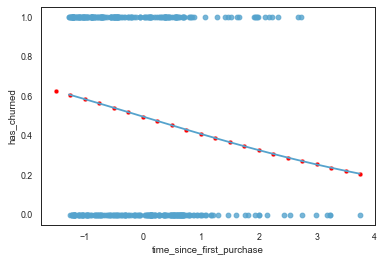

In [50]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x='time_since_first_purchase',y='has_churned',data=churn,logistic=True,ci=None)

# Overlay with prediction_data, colored red
sns.scatterplot(x='time_since_first_purchase',y='has_churned',data=prediction_data,color='red')

plt.show()

In [64]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# Update condition 
labels = ['1.not churn', '2.less possible to churn', '3.about to churn', '4.most likely to churn']
range =[0,0.25,0.5,0.75,1]
prediction_data['churn_category']=pd.cut(prediction_data['has_churned'],labels=labels,bins = range)

# Print the head
print(prediction_data.head())


   time_since_first_purchase  has_churned  most_likely_outcome  \
0                      -1.50     0.626448                  1.0   
1                      -1.25     0.605470                  1.0   
2                      -1.00     0.584096                  1.0   
3                      -0.75     0.562401                  1.0   
4                      -0.50     0.540465                  1.0   

     churn_category  
0  3.about to churn  
1  3.about to churn  
2  3.about to churn  
3  3.about to churn  
4  3.about to churn  


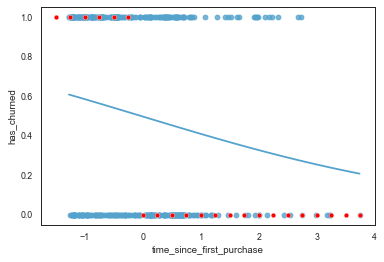

In [65]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",y="most_likely_outcome", 
data=prediction_data,color = 'red')

plt.show()

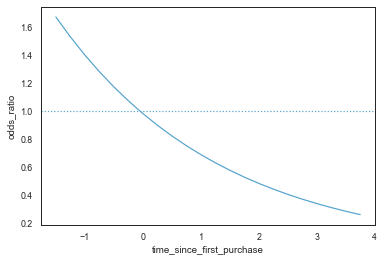

In [66]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(data=prediction_data,y='odds_ratio',x='time_since_first_purchase' )

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

In [67]:
# Update prediction data with log_odds_ratio
prediction_data['log_odds_ratio']=np.log(prediction_data['odds_ratio'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  \
0                      -1.50     0.626448                  1.0   
1                      -1.25     0.605470                  1.0   
2                      -1.00     0.584096                  1.0   
3                      -0.75     0.562401                  1.0   
4                      -0.50     0.540465                  1.0   

     churn_category  odds_ratio  log_odds_ratio  
0  3.about to churn    1.677003        0.517008  
1  3.about to churn    1.534661        0.428309  
2  3.about to churn    1.404400        0.339610  
3  3.about to churn    1.285197        0.250912  
4  3.about to churn    1.176111        0.162213  


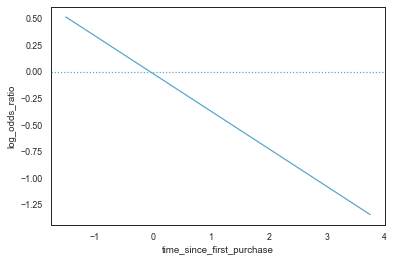

In [68]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

# Quantifying logistic regression fit 
- The four outcomes/confusion matrix 
  - predicted false = actual false == correct
  - predicted false == actual true ==false negative
  - predicted true == actual false ==false positive
  - predicted true == actual true == correct
- confusion matrix : counts of outcomes
  - actual_response = churn['has_churned']
  - predicted_response = np.round(mdl_recency.predict())
  - outcomes = pd.DataFrame({'actual_response':actual_response,'predicted_response':predicted_response})
  - print(outcomes.value_counts(sort=False))
- visualizing the confusion matrix
  - conf_matrix = mdl_recency.pred_table()
  - print(conf_matrix)
  - from statsmodels.graphic.mosaicplot
  - import mosaic
  - mosaic(conf_matrix)

- Accuracy is the proportion of correct predictions
  - accuracy = (# of true negative + # of true positive) /number of observations
  - higher accuracy is better

- Sensitivity is the proportion of true positive
  - sensitivity = # of true positive/ (# of false negative + # of true positive)
  - higher sensitivity is better
 
- Specificity
  - specificity is the proportion of true negatives
  - specificity = # of true positive/(# of true negative + # of false positive)
  - higher specificity is better

- increasing specificity will decrease sensitivity or otherwise

In [69]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response':actual_response,
 'predicted_response':predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
Name: count, dtype: int64


[[112.  88.]
 [ 76. 124.]]


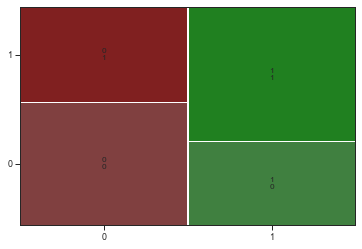

In [70]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [75]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+FN+FP+TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
